In [ ]:
version="MSE V1"

In [ ]:
TipoDeformacion=3
# 0 Random
# 1 Blanco y negro
# 2 Manchas
# 3 Rayas

# Imports

In [ ]:
import matplotlib.pyplot as plt
import zipfile
from PIL import Image
from keras.models import save_model
import io
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install noise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for noise: filename=noise-1.2.2-cp310-cp310-linux_x86_64.whl size=56275 sha256=5d2950fa55e56b425d91dd902700a95c6a138f0ed818be9029f5ca9d269a6660
  Stored in directory: /root/.cache/pip/wheels/b2/01/64/ca2f6ed556c204d5ce2d3719a58757a5504aeb5525654692d0
Successfully built noise


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input,Conv2DTranspose, Conv2D,Conv3D, Dense, Activation, Flatten, Reshape, Dropout, UpSampling2D, MaxPooling2D, BatchNormalization, Concatenate,LeakyReLU

from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import os
import cv2

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
from IPython.display import display

# Descompresion del zip

In [ ]:
import zipfile
import os



archivo_zip = '/content/drive/MyDrive/Trabajo fin de grado TFG/Dataset/CelebFaces/CelebFaces.zip'


directorio_destino = '/content/Celeb'


if os.path.exists(archivo_zip):

    if not os.path.exists(directorio_destino):
        os.makedirs(directorio_destino)


    with zipfile.ZipFile(archivo_zip, 'r') as zip_ref:

        zip_ref.extractall(directorio_destino)

    print("Extracción completada.")
else:
    print("El archivo ZIP especificado no existe.")


Extracción completada.


## extraccion csv

In [ ]:
import csv


ruta_atributos = '/content/Celeb/list_attr_celeba.csv'
ruta_bbox = '/content/Celeb/list_bbox_celeba.csv'
ruta_particion = '/content/Celeb/list_eval_partition.csv'
ruta_puntos_referencia_alineados = '/content/Celeb/list_landmarks_align_celeba.csv'



def abrirCsv(archivo_csv):

  datos = []
  with open(archivo_csv, newline='') as csvfile:

      lector_csv = csv.DictReader(csvfile)


      for fila in lector_csv:

          datos.append(dict(fila))
  return datos

def imprimirCsv(datos):
  for registro in datos[:5]:
    print(registro)


atributos =abrirCsv(ruta_atributos)
bbox =abrirCsv(ruta_bbox)
particion =abrirCsv(ruta_particion)
puntos_referencia_alineados =abrirCsv(ruta_puntos_referencia_alineados)



imprimirCsv(atributos)
imprimirCsv(bbox)
imprimirCsv(particion)
imprimirCsv(puntos_referencia_alineados)




'\natributos =abrirCsv(ruta_atributos)\nbbox =abrirCsv(ruta_bbox)\nparticion =abrirCsv(ruta_particion)\npuntos_referencia_alineados =abrirCsv(ruta_puntos_referencia_alineados)\n\n\n\nimprimirCsv(atributos)\nimprimirCsv(bbox)\nimprimirCsv(particion)\nimprimirCsv(puntos_referencia_alineados)\n\n'

In [ ]:
'''print(len(atributos[0]))
print(len(bbox[0]))
print(len(particion[0]))
print(len(puntos_referencia_alineados[0]))'''

'print(len(atributos[0]))\nprint(len(bbox[0]))\nprint(len(particion[0]))\nprint(len(puntos_referencia_alineados[0]))'

In [ ]:

def mostrar_ejemplos(images, num_ejemplos=5):
    plt.figure(figsize=(12, 12))
    for i in range(num_ejemplos):
        plt.subplot(1, num_ejemplos, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
    plt.show()




# Unet

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def unet_model(input_shape=(128, 128, 3)):
    inputs = layers.Input(shape=input_shape)

    # Encoder
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = layers.MaxPooling2D((2, 2))(c4)

    # Bottleneck
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)

    # Decoder
    u6 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

    u7 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

    u8 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

    u9 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1])
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

    outputs = layers.Conv2D(3, (1, 1), activation='tanh')(c9)

    model = models.Model(inputs=[inputs], outputs=[outputs])

    return model


model = unet_model()
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])


model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 64)         1792      ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 128, 128, 64)         36928     ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 64, 64, 64)           0         ['conv2d_1[0][0]']            
 D)                                                                                           

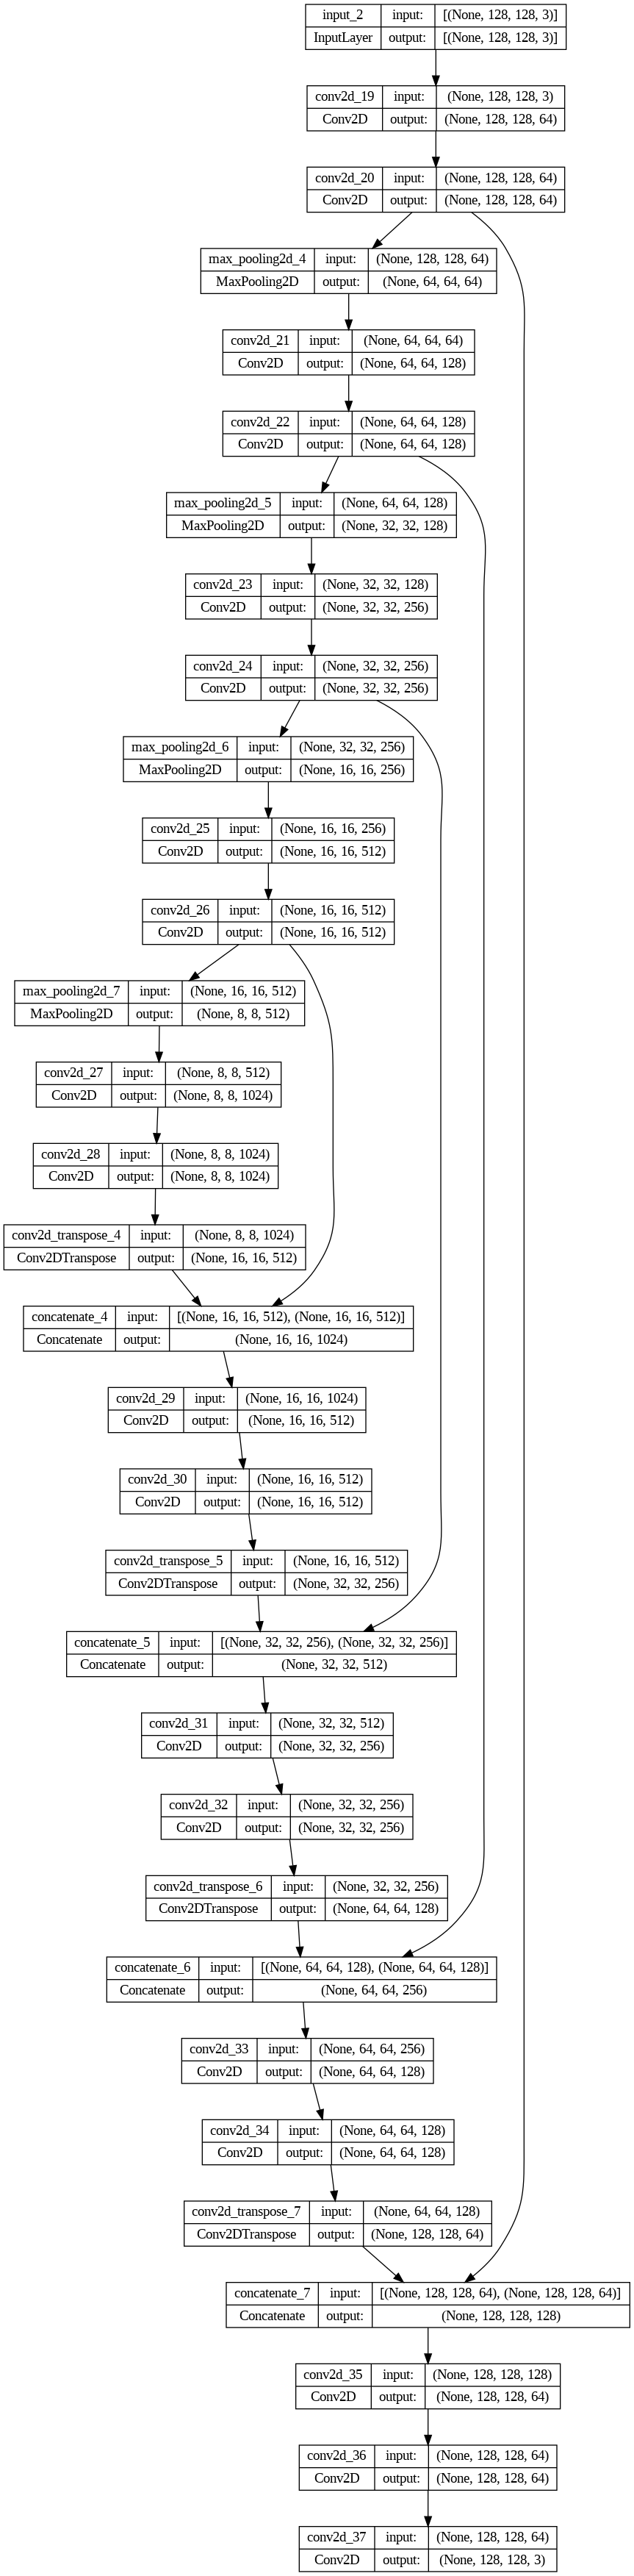

In [ ]:

generator = unet_model()
generator.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
plot_model(generator, show_shapes=True, show_layer_names=True)

# Modificaciones

In [ ]:
def convertir_a_escala_de_grises_con_canal(imagen_np):

    canal_r = imagen_np[:, :, 0]
    canal_g = imagen_np[:, :, 1]
    canal_b = imagen_np[:, :, 2]


    imagen_gris = (0.2989 * canal_r + 0.5870 * canal_g + 0.1140 * canal_b).astype(np.uint8)


    imagen_gris_con_canal = np.stack((imagen_gris, imagen_gris, imagen_gris), axis=-1)

    return imagen_gris_con_canal


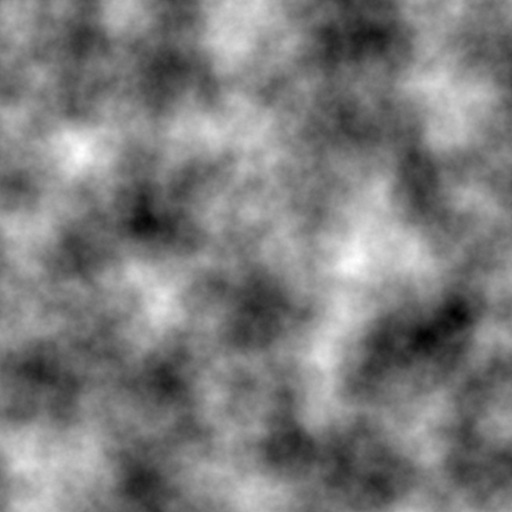

In [ ]:
import cv2
import numpy as np
import noise
import random

def generate_wrinkle_texture(width, height,scale=100,octaves=6,persistence=0.5,lacunarity=2.0):

    seed = np.random.randint(0, 100)
    texture = np.zeros((height, width), dtype=np.float32)


    for y in range(height):
        for x in range(width):
            value = noise.pnoise2(x / scale,
                                  y / scale,
                                  octaves=octaves,
                                  persistence=persistence,
                                  lacunarity=lacunarity,
                                  repeatx=width,
                                  repeaty=height,
                                  base=seed)
            texture[y][x] = value

    texture = ((texture - np.min(texture)) / (np.max(texture) - np.min(texture))) * 255
    texture = texture.astype(np.uint8)

    return texture


width = 512
height = 512
texture = generate_wrinkle_texture(width, height)
cv2_imshow(texture)



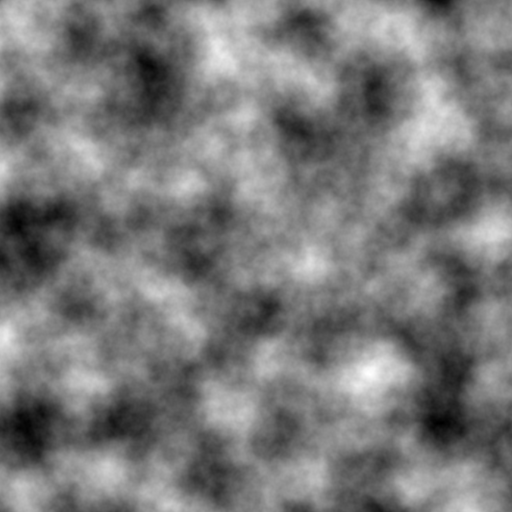

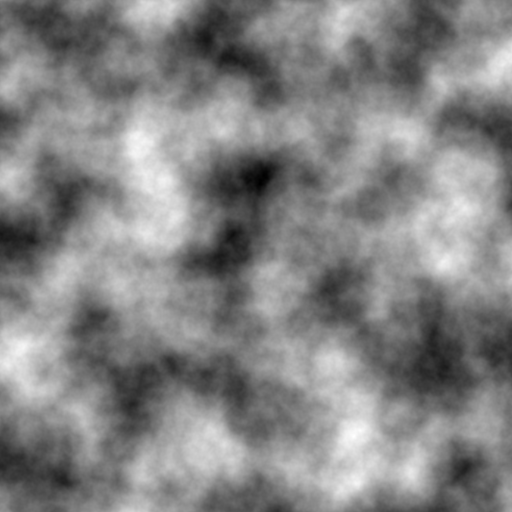

In [ ]:

width = 512
height = 512
texture = generate_wrinkle_texture(width, height)
cv2_imshow(texture)
texture = generate_wrinkle_texture(width, height)
cv2_imshow(texture)

In [ ]:
def apply_wrinkled_paper_effect(image, opacity=0, lower_threshold=0.1, upper_threshold=0.15, border_color=(255, 255, 255)):

    mancha = np.ones((image.shape[0], image.shape[1],3), dtype=np.uint8) * 100
    texture = generate_wrinkle_texture(image.shape[1], image.shape[0])
    texture = cv2.resize(texture, (image.shape[1], image.shape[0]))
    texture = texture.astype(np.float32) / 255.0


    lower_mask = np.where(texture < lower_threshold, 1, 0)


    upper_mask = np.where(texture < upper_threshold, 1, 0)


    border_mask = np.logical_and(upper_mask, np.logical_not(lower_mask))


    wrinkled_paper_image = (1 - opacity) * image + opacity * (image * texture[:, :, np.newaxis])


    wrinkled_paper_image = wrinkled_paper_image * (1 - lower_mask[:, :, np.newaxis])


    wrinkled_paper_image[border_mask] = border_color

    wrinkled_paper_image = np.clip(wrinkled_paper_image, 0, 255).astype(np.uint8)





    wrinkled_paper_image2 = (1 - opacity) * mancha + opacity * (mancha * texture[:, :, np.newaxis])


    wrinkled_paper_image2 = wrinkled_paper_image2 * (1 - lower_mask[:, :, np.newaxis])


    wrinkled_paper_image2[border_mask] = border_color

    wrinkled_paper_image2 = np.clip(wrinkled_paper_image2, 0, 255).astype(np.uint8)






    return wrinkled_paper_image,wrinkled_paper_image2

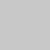

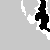

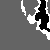

In [ ]:

image_white_uint8 = np.ones((50, 50, 3), dtype=np.uint8) * 200
cv2_imshow(image_white_uint8)

aux,aux2=apply_wrinkled_paper_effect(image_white_uint8)
cv2_imshow(aux)
cv2_imshow(aux2)

In [ ]:
def apply_canny(image,umbral=35):

    canny_edges = cv2.Canny(image, umbral, umbral*2)
    return canny_edges

In [ ]:
def mini_roturas(image):
  umbral=35
  texture = generate_wrinkle_texture(image.shape[1], image.shape[0])
  grietas = cv2.Canny(wrinkle_texture, umbral, umbral*2)
  return grietas

In [ ]:
def add_white_border(image, thickness):

    bordered_image = cv2.copyMakeBorder(image, thickness, thickness, thickness, thickness, cv2.BORDER_CONSTANT, value=(255, 255, 255))
    return bordered_image

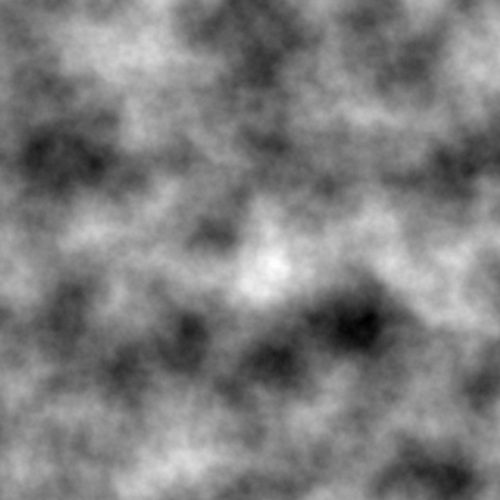

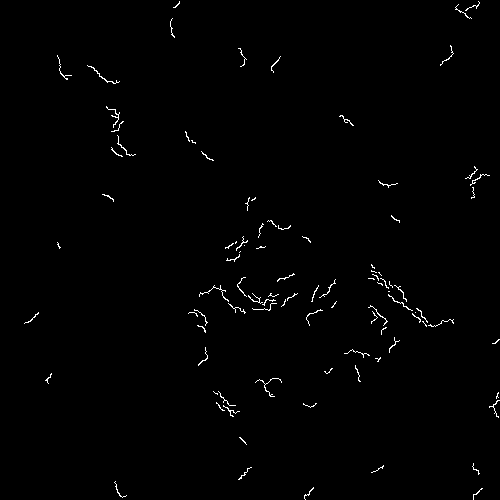

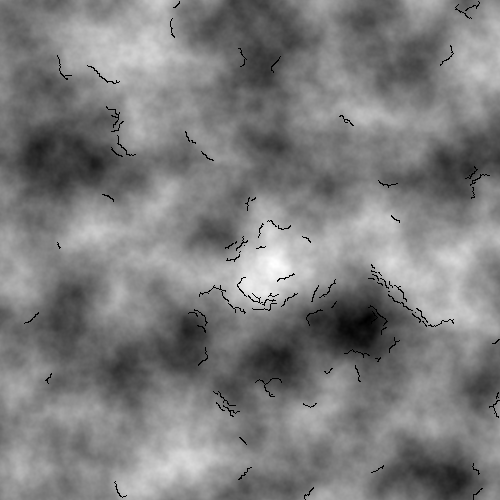

In [ ]:
import cv2
import numpy as np





wrinkle_texture = generate_wrinkle_texture(500, 500)
cv2_imshow(wrinkle_texture)

canny_image = apply_canny(wrinkle_texture)
cv2_imshow(canny_image)

dest_image = np.zeros_like(wrinkle_texture)


wrinkle_texture[canny_image > 0] = 0


cv2_imshow(wrinkle_texture)


In [ ]:

def blanco_y_negro(imagen_np):
  imagen_np = convertir_a_escala_de_grises_con_canal(imagen_np)
  return imagen_np
def manchas(imagen_np):
  imagen_np, imagenManchas =apply_wrinkled_paper_effect(imagen_np)
  return imagen_np,imagenManchas

def rayas(imagen_np):
  wrinkle_texture = generate_wrinkle_texture(imagen_np.shape[1], imagen_np.shape[0])
  canny_image = apply_canny(wrinkle_texture)
  imagen_np[canny_image > 0] = 0
  return imagen_np


In [ ]:
from google.colab.patches import cv2_imshow

# Lotes

In [ ]:
import os
import random
import numpy as np
from PIL import Image

def blanco_y_negro(imagen_np):
    imagen_np = convertir_a_escala_de_grises_con_canal(imagen_np)
    return imagen_np

def manchas(imagen_np):
    imagen_np,manchas = apply_wrinkled_paper_effect(imagen_np)

    return imagen_np

def rayas(imagen_np):
    wrinkle_texture = generate_wrinkle_texture(imagen_np.shape[1], imagen_np.shape[0])
    canny_image = apply_canny(wrinkle_texture)
    imagen_np[canny_image > 0] = 0
    return imagen_np
import cv2
import numpy as np

def rayas(imagen_np):

    wrinkle_texture = generate_wrinkle_texture(imagen_np.shape[1], imagen_np.shape[0])


    canny_image = apply_canny(wrinkle_texture,50)


    kernel1 = np.ones((4, 4), np.uint8)
    kernel2 = np.ones((2, 2), np.uint8)
    dilated_image1 = cv2.dilate(canny_image, kernel1, iterations=1)
    dilated_image2 = cv2.dilate(canny_image, kernel2, iterations=1)

    imagen_np[dilated_image1 > 0] = 255
    imagen_np[dilated_image2 > 0] = 0

    return imagen_np


def generar_lotes_imagenes_mod(carpeta, tamaño_lote,num=1):
    lista_imagenes = os.listdir(carpeta)
    inicio = 0
    while inicio < len(lista_imagenes):
        fin = min(inicio + tamaño_lote, len(lista_imagenes))
        lotes = []
        lotesManchas = []
        for imagen_nombre in lista_imagenes[inicio:fin]:
            ruta_imagen = os.path.join(carpeta, imagen_nombre)
            imagen = Image.open(ruta_imagen)
            imagen = imagen.resize((128, 128))

            imagen_np = np.array(imagen)


            if num==0:
              numeroDefecto = random.randint(1, 3)
            else:
              numeroDefecto=num


            switch = {
                1: blanco_y_negro,
                2: manchas,
                3: rayas
            }


            imagen_np = switch.get(numeroDefecto, lambda x: x)(imagen_np)
            imagen_np = imagen_np.astype('float32') / 127.5 - 1

            lotes.append(imagen_np)

        yield np.array(lotes)
        inicio = fin




'\ngenerador = generar_lotes_imagenes(carpeta_imagenes, 32)\ngenerador2 = generar_lotes_imagenes_mod(carpeta_imagenes, 32)\nfor lote in generador:\n  print(len(lote[0]))\n  print(len(lote[0][0]))\n  mostrar_ejemplos(lote, num_ejemplos=5)\n'

In [ ]:
def generar_lotes_imagenes(carpeta, tamaño_lote):
    lista_imagenes = os.listdir(carpeta)
    inicio = 0
    while inicio < len(lista_imagenes):
        fin = min(inicio + tamaño_lote, len(lista_imagenes))
        lotes = []
        for imagen_nombre in lista_imagenes[inicio:fin]:
            ruta_imagen = os.path.join(carpeta, imagen_nombre)
            imagen = Image.open(ruta_imagen)
            imagen = imagen.resize((128, 128))

            imagen_np = np.array(imagen)

            imagen_np = imagen_np.astype('float32') / 127.5 - 1
            lotes.append(imagen_np)
        yield np.array(lotes)
        inicio = fin

Generador original:


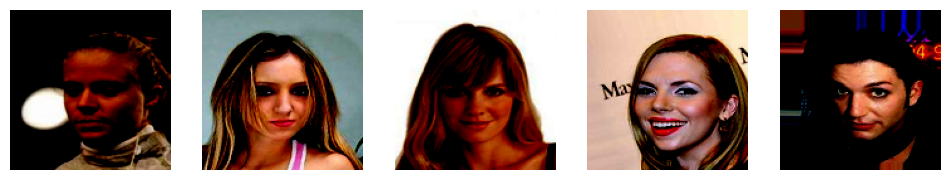

Generador modificado:


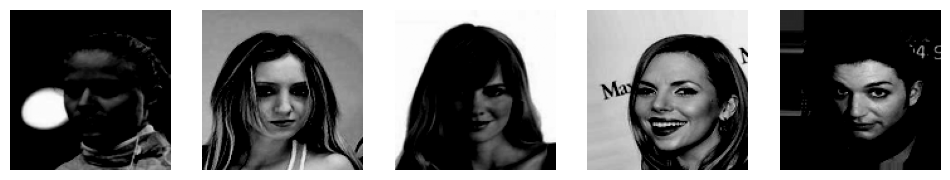

In [ ]:
carpeta_imagenes = '/content/Celeb/img_align_celeba/img_align_celeba'
generador2 = generar_lotes_imagenes_mod(carpeta_imagenes, 32)
generador = generar_lotes_imagenes(carpeta_imagenes, 32)



for lote_generador, lote_generador2 in zip(generador, generador2):

    print("Generador original:")

    mostrar_ejemplos(lote_generador, num_ejemplos=5)


    print("Generador modificado:")

    mostrar_ejemplos(lote_generador2, num_ejemplos=5)
    break


# visualización

In [ ]:
def plot_losses(history):
    plt.rcParams['figure.figsize'] = [20, 5]
    f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)

    ax1.set_title('Losses')
    ax1.set_xlabel('epoch')
    ax1.legend(loc="upper right")
    ax1.grid()

    ax1.plot(history['d_loss'], label='D loss')
    ax1.plot(history['g_loss'], label='G loss')
    ax1.legend()

    ax2.set_title('D accuracy')
    ax2.set_xlabel('epoch')
    ax2.legend(loc="upper right")
    ax2.grid()

    ax2.plot(history['d_acc'], label='Accuracy')
    ax2.legend()

    plt.show()

In [ ]:
import matplotlib.pyplot as plt

def sample_images(epoch, batch, imgs1, imgs2, imgs3):
    plt.rcParams['figure.figsize'] = [20, 14]
    fig, axs = plt.subplots(3, 5)
    fig.suptitle('Epoch: ' + str(epoch) + ', Batch: ' + str(batch), fontsize=16)

    for ax in axs.flat:
        ax.axis('off')

    for i in range(5):
        axs[0, i].imshow(imgs1[i])
        axs[0, i].set_title('Originales', fontsize=10)


    for i in range(5):
        axs[1, i].imshow(imgs2[i])
        axs[1, i].set_title('Modificadas', fontsize=10)

    for i in range(5):
        axs[2, i].imshow(imgs3[i])
        axs[2, i].set_title('Generadas', fontsize=10)


    plt.tight_layout()
    plt.show()
    plt.close()



In [ ]:
import os
import matplotlib.pyplot as plt

def sample_images(epoch, batch, imgs1, imgs2, imgs3, save_path):
    plt.rcParams['figure.figsize'] = [20, 14]
    fig, axs = plt.subplots(3, 5)
    fig.suptitle('Epoch: ' + str(epoch) + ', Batch: ' + str(batch), fontsize=16)

    for ax in axs.flat:
        ax.axis('off')

    for i in range(5):
        axs[0, i].imshow(imgs1[i])
        axs[0, i].set_title('Originales', fontsize=10)

    for i in range(5):
        axs[1, i].imshow(imgs2[i])
        axs[1, i].set_title('Modificadas', fontsize=10)

    for i in range(5):
        axs[2, i].imshow(imgs3[i])
        axs[2, i].set_title('Generadas', fontsize=10)

    plt.tight_layout()

    if not os.path.exists(save_path):
        os.makedirs(save_path)
    plt.savefig(os.path.join(save_path, f'epoch_{epoch}_batch_{batch}.png'))
    plt.close()


# Historia

In [ ]:
def plot_losses(history):
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Guardado y carga

In [ ]:
import os

def guardar_modelo(Unet, TipoDeformacion):

    ruta_base = "/content/drive/MyDrive/Trabajo fin de grado TFG/Modelos/Modelos Archivos2/"


    if TipoDeformacion == 1:
        carpeta = "UnetByN/"
    elif TipoDeformacion == 2:
        carpeta = "UnetManchas/"
    elif TipoDeformacion == 3:
        carpeta = "UnetRayas/"
    elif TipoDeformacion == 0:
        carpeta = "UnetRandom/"
    else:
        raise ValueError("TipoDeformacion no válido")


    ruta_completa = os.path.join(ruta_base, carpeta)


    if not os.path.exists(ruta_completa):
        os.makedirs(ruta_completa)
        print(f"Creada la ruta: {ruta_completa}")


    save_model(Unet, os.path.join(ruta_completa, 'unet.keras'))
    print(f"Modelo guardado en: {os.path.join(ruta_completa, 'unet.keras')}")




In [ ]:
ruta_fotos = "/content/drive/MyDrive/Trabajo fin de grado TFG/Fotos/"

if TipoDeformacion == 1:
    carpeta = "UnetByN/"

    fotos_path = ruta_fotos + carpeta +version+"/"
elif TipoDeformacion == 2:
    carpeta = "UnetManchas/"

    fotos_path = ruta_fotos + carpeta +version+"/"
elif TipoDeformacion == 3:
    carpeta = "UnetRayas/"

    fotos_path = ruta_fotos + carpeta +version+"/"
elif TipoDeformacion == 0:
    carpeta = "UnetRandom/"

    fotos_path = ruta_fotos + carpeta+version+"/"
else:
    raise ValueError("TipoDeformacion no válido. Debe ser 1, 2 o 3.")

In [ ]:
import tensorflow as tf
import os


def cargar_modelo(TipoDeformacion):
    ruta_modelos = "/content/drive/MyDrive/Trabajo fin de grado TFG/Modelos/Modelos Archivos2/"
    ruta_fotos = "/content/drive/MyDrive/Trabajo fin de grado TFG/Modelos/Modelos Archivos/"

    if TipoDeformacion == 1:
        carpeta = "UnetByN/"
        modelo_path = ruta_modelos + carpeta + 'unet.keras'

    elif TipoDeformacion == 2:
        carpeta = "UnetManchas/"
        modelo_path = ruta_modelos + carpeta + 'unet.keras'

    elif TipoDeformacion == 3:
        carpeta = "UnetRayas/"
        modelo_path = ruta_modelos + carpeta + 'unet.keras'

    elif TipoDeformacion == 0:
        carpeta = "UnetRandom/"
        modelo_path = ruta_modelos + carpeta + 'unet.keras'

    else:
        raise ValueError("TipoDeformacion no válido. Debe ser 1, 2 o 3.")


    if not os.path.exists(modelo_path):
        print(f"No existe la ruta: {modelo_path}")
        return None



    modelo = tf.keras.models.load_model(modelo_path)
    print(f"Modelo cargado desde {modelo_path}")
    return modelo




# Train

In [ ]:
import tensorflow as tf
from tensorflow.keras import models
import os
import numpy as np
import matplotlib.pyplot as plt


def plot_losses(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history['accuracy'], label='Training Accuracy')
    plt.plot(history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

def train(Unet, epochs, batch_size=32, sample_interval=100):
    carpeta_imagenes = '/content/Celeb/img_align_celeba/img_align_celeba'
    tamaño_lote = batch_size


    history = {'loss': [], 'accuracy': [], 'val_loss': [], 'val_accuracy': []}

    for epoch in range(epochs):
        print("----EPOCH " + str(epoch) + '-----')
        batch = 0

        generador = generar_lotes_imagenes(carpeta_imagenes, tamaño_lote)
        generador2 = generar_lotes_imagenes_mod(carpeta_imagenes, tamaño_lote,TipoDeformacion)

        for imagenes_output, imagenes_input in zip(generador, generador2):




            metrics = Unet.train_on_batch(imagenes_input, imagenes_output)
            loss = metrics[0]
            accuracy = metrics[1]


            history['loss'].append(loss)
            history['accuracy'].append(accuracy)



            gen_imgs = Unet.predict(imagenes_input, verbose=0)


            if batch % 50 == 0:

                print("%d [Loss: %.4f, Accuracy: %.4f]" % (batch, loss, accuracy))

            if batch % sample_interval == 0:
                gen_imgs = (gen_imgs.astype('float32') + 1) * 127.5 / 255
                imagenes_output = (imagenes_output.astype('float32') + 1) * 127.5 / 255
                imagenes_input = (imagenes_input.astype('float32') + 1) * 127.5 / 255

                sample_images(epoch, batch, imagenes_output, imagenes_input, gen_imgs,fotos_path)


                guardar_modelo(Unet, TipoDeformacion)

            batch += 1
            if batch % (sample_interval) == 0:
              plot_losses(history)
        plot_losses(history)




In [ ]:

model = unet_model()
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])


Unet = cargar_modelo(TipoDeformacion)


if Unet is not None:

    model = Unet


No existe la ruta: /content/drive/MyDrive/Trabajo fin de grado TFG/Modelos/Modelos Archivos2/UnetRayas/unet.keras


----EPOCH 0-----
0 [Loss: 0.3462, Accuracy: 0.0896]
Creada la ruta: /content/drive/MyDrive/Trabajo fin de grado TFG/Modelos/Modelos Archivos2/UnetRayas/
Modelo guardado en: /content/drive/MyDrive/Trabajo fin de grado TFG/Modelos/Modelos Archivos2/UnetRayas/unet.keras
50 [Loss: 0.0308, Accuracy: 0.8591]
100 [Loss: 0.0197, Accuracy: 0.8161]
150 [Loss: 0.0142, Accuracy: 0.8811]
200 [Loss: 0.0123, Accuracy: 0.8460]
250 [Loss: 0.0085, Accuracy: 0.8907]
300 [Loss: 0.0069, Accuracy: 0.8947]
350 [Loss: 0.0091, Accuracy: 0.8850]
400 [Loss: 0.0077, Accuracy: 0.9190]
450 [Loss: 0.0084, Accuracy: 0.8793]


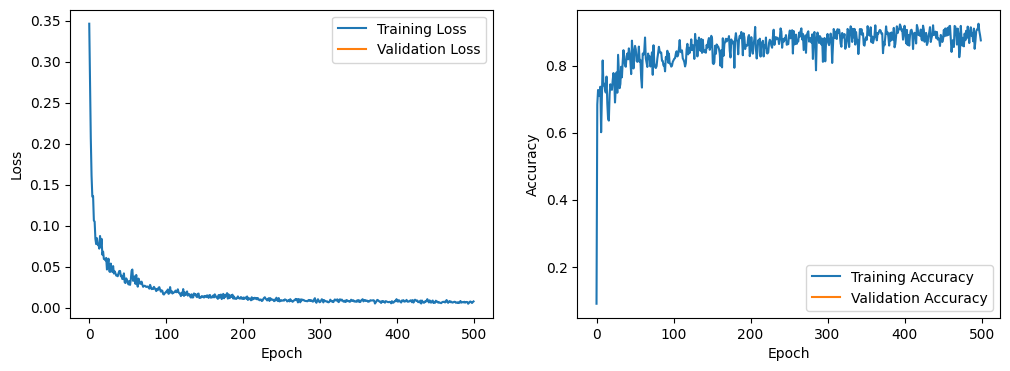

500 [Loss: 0.0061, Accuracy: 0.8715]
Modelo guardado en: /content/drive/MyDrive/Trabajo fin de grado TFG/Modelos/Modelos Archivos2/UnetRayas/unet.keras
550 [Loss: 0.0071, Accuracy: 0.9030]
600 [Loss: 0.0069, Accuracy: 0.9064]
650 [Loss: 0.0053, Accuracy: 0.8895]
700 [Loss: 0.0051, Accuracy: 0.9122]
750 [Loss: 0.0053, Accuracy: 0.9184]
800 [Loss: 0.0052, Accuracy: 0.9124]
850 [Loss: 0.0051, Accuracy: 0.9145]
900 [Loss: 0.0056, Accuracy: 0.9091]
950 [Loss: 0.0049, Accuracy: 0.9280]


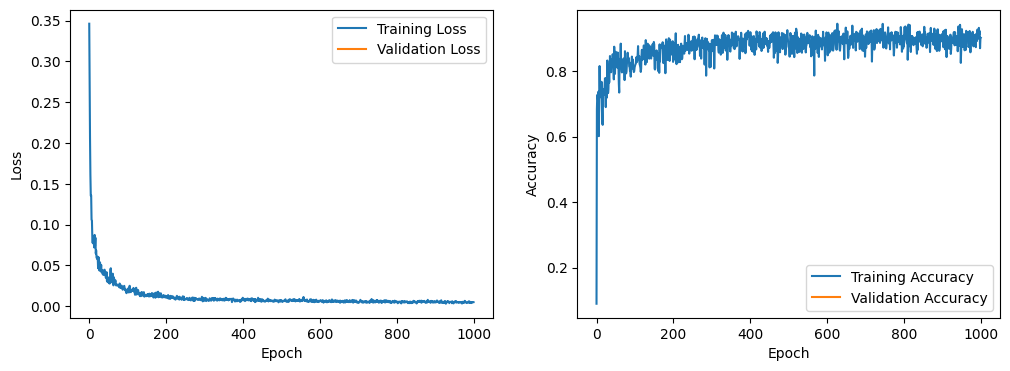

1000 [Loss: 0.0063, Accuracy: 0.9009]
Modelo guardado en: /content/drive/MyDrive/Trabajo fin de grado TFG/Modelos/Modelos Archivos2/UnetRayas/unet.keras
1050 [Loss: 0.0039, Accuracy: 0.8851]
1100 [Loss: 0.0049, Accuracy: 0.8358]
1150 [Loss: 0.0029, Accuracy: 0.9468]
1200 [Loss: 0.0046, Accuracy: 0.9143]
1250 [Loss: 0.0051, Accuracy: 0.8581]
1300 [Loss: 0.0050, Accuracy: 0.8985]
1350 [Loss: 0.0043, Accuracy: 0.9059]
1400 [Loss: 0.0035, Accuracy: 0.9236]
1450 [Loss: 0.0038, Accuracy: 0.8899]


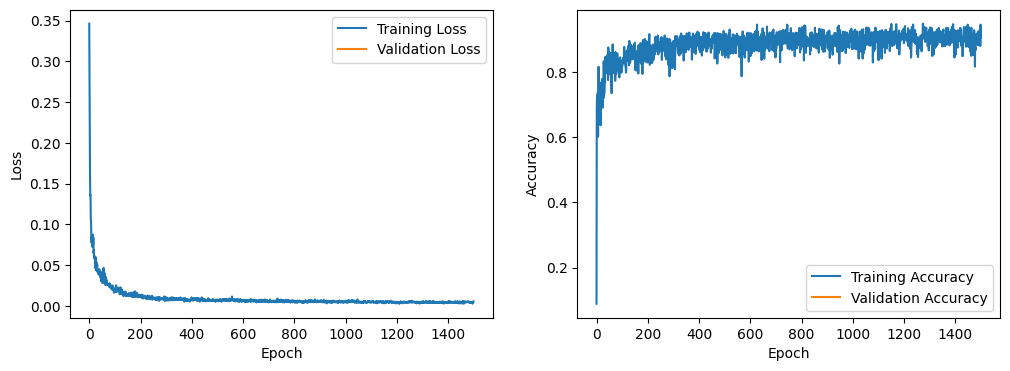

1500 [Loss: 0.0036, Accuracy: 0.8943]
Modelo guardado en: /content/drive/MyDrive/Trabajo fin de grado TFG/Modelos/Modelos Archivos2/UnetRayas/unet.keras
1550 [Loss: 0.0035, Accuracy: 0.9050]
1600 [Loss: 0.0041, Accuracy: 0.9214]
1650 [Loss: 0.0045, Accuracy: 0.8543]
1700 [Loss: 0.0038, Accuracy: 0.9215]
1750 [Loss: 0.0030, Accuracy: 0.9026]
1800 [Loss: 0.0033, Accuracy: 0.8941]
1850 [Loss: 0.0039, Accuracy: 0.8965]
1900 [Loss: 0.0037, Accuracy: 0.9309]
1950 [Loss: 0.0037, Accuracy: 0.8566]


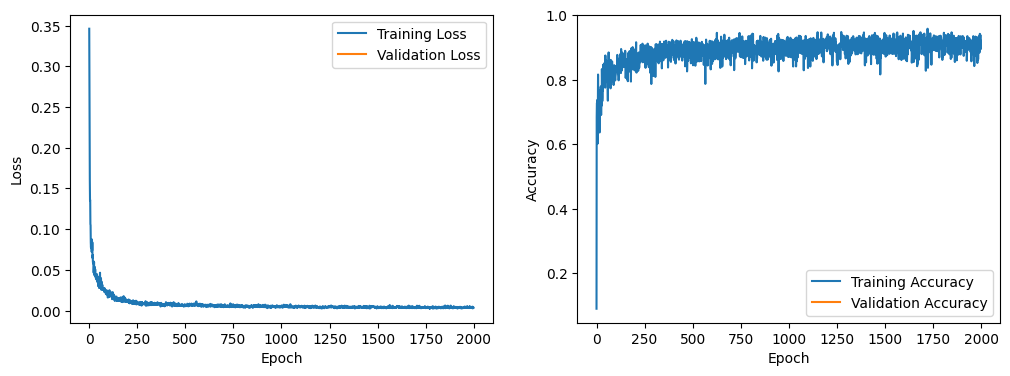

2000 [Loss: 0.0037, Accuracy: 0.9273]
Modelo guardado en: /content/drive/MyDrive/Trabajo fin de grado TFG/Modelos/Modelos Archivos2/UnetRayas/unet.keras
2050 [Loss: 0.0048, Accuracy: 0.9152]
2100 [Loss: 0.0034, Accuracy: 0.8917]
2150 [Loss: 0.0031, Accuracy: 0.9034]
2200 [Loss: 0.0047, Accuracy: 0.9025]
2250 [Loss: 0.0035, Accuracy: 0.9263]
2300 [Loss: 0.0037, Accuracy: 0.9272]
2350 [Loss: 0.0031, Accuracy: 0.9389]
2400 [Loss: 0.0027, Accuracy: 0.9215]
2450 [Loss: 0.0033, Accuracy: 0.9037]


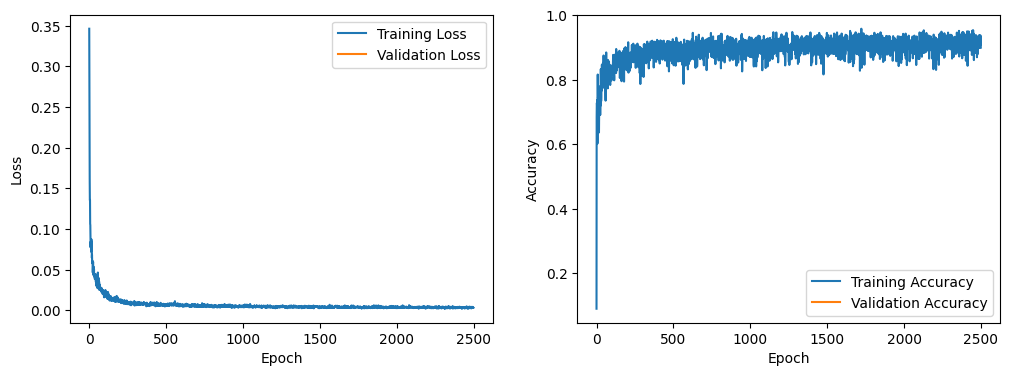

2500 [Loss: 0.0032, Accuracy: 0.9075]
Modelo guardado en: /content/drive/MyDrive/Trabajo fin de grado TFG/Modelos/Modelos Archivos2/UnetRayas/unet.keras
2550 [Loss: 0.0033, Accuracy: 0.9367]
2600 [Loss: 0.0036, Accuracy: 0.9307]
2650 [Loss: 0.0028, Accuracy: 0.9115]
2700 [Loss: 0.0028, Accuracy: 0.9248]
2750 [Loss: 0.0029, Accuracy: 0.9382]
2800 [Loss: 0.0027, Accuracy: 0.9032]
2850 [Loss: 0.0029, Accuracy: 0.9168]
2900 [Loss: 0.0029, Accuracy: 0.9178]
2950 [Loss: 0.0037, Accuracy: 0.9248]


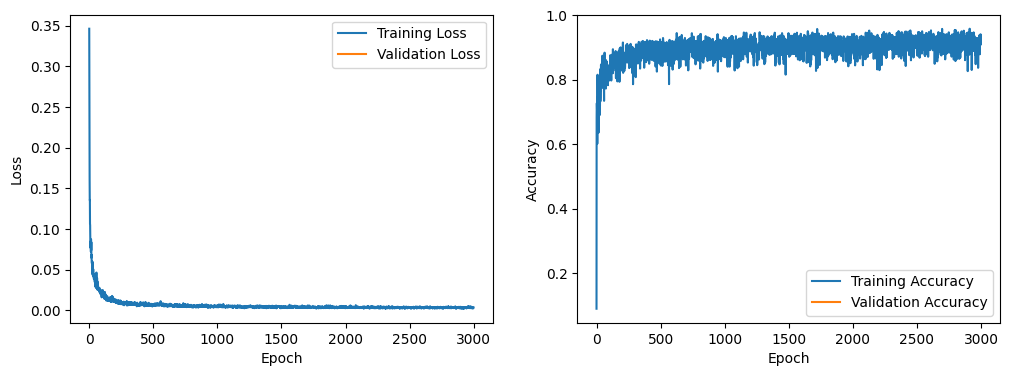

3000 [Loss: 0.0029, Accuracy: 0.9121]
Modelo guardado en: /content/drive/MyDrive/Trabajo fin de grado TFG/Modelos/Modelos Archivos2/UnetRayas/unet.keras
3050 [Loss: 0.0028, Accuracy: 0.9430]
3100 [Loss: 0.0029, Accuracy: 0.8954]
3150 [Loss: 0.0039, Accuracy: 0.8968]
3200 [Loss: 0.0030, Accuracy: 0.8751]
3250 [Loss: 0.0033, Accuracy: 0.9070]
3300 [Loss: 0.0032, Accuracy: 0.9214]
3350 [Loss: 0.0029, Accuracy: 0.9297]
3400 [Loss: 0.0026, Accuracy: 0.9177]
3450 [Loss: 0.0020, Accuracy: 0.9290]


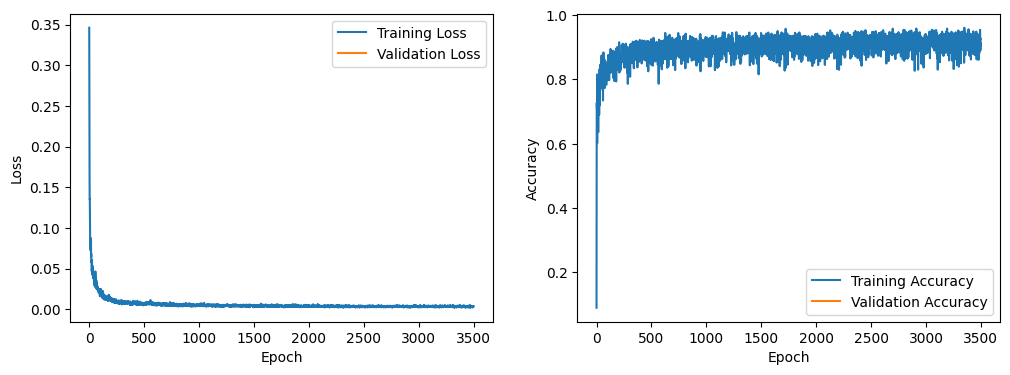

3500 [Loss: 0.0031, Accuracy: 0.8668]
Modelo guardado en: /content/drive/MyDrive/Trabajo fin de grado TFG/Modelos/Modelos Archivos2/UnetRayas/unet.keras
3550 [Loss: 0.0034, Accuracy: 0.9209]
3600 [Loss: 0.0031, Accuracy: 0.9066]
3650 [Loss: 0.0035, Accuracy: 0.9143]
3700 [Loss: 0.0027, Accuracy: 0.9317]
3750 [Loss: 0.0033, Accuracy: 0.9306]
3800 [Loss: 0.0025, Accuracy: 0.9278]
3850 [Loss: 0.0024, Accuracy: 0.9045]
3900 [Loss: 0.0034, Accuracy: 0.8971]
3950 [Loss: 0.0039, Accuracy: 0.9097]


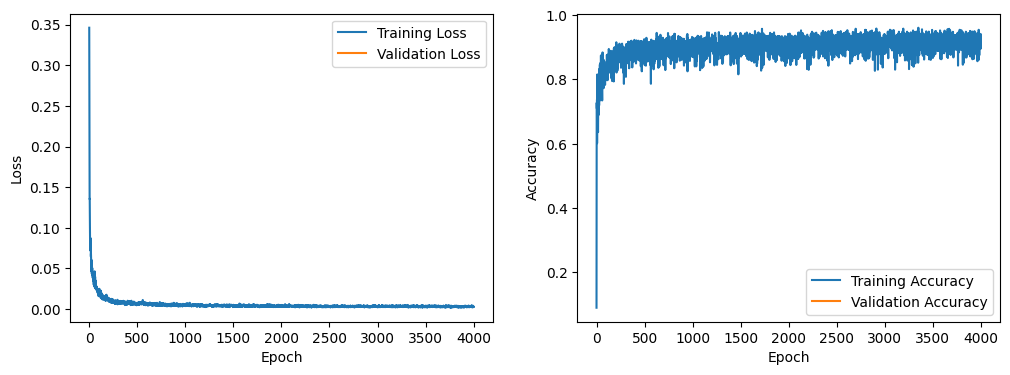

4000 [Loss: 0.0023, Accuracy: 0.9207]
Modelo guardado en: /content/drive/MyDrive/Trabajo fin de grado TFG/Modelos/Modelos Archivos2/UnetRayas/unet.keras
4050 [Loss: 0.0033, Accuracy: 0.8916]
4100 [Loss: 0.0040, Accuracy: 0.9191]
4150 [Loss: 0.0022, Accuracy: 0.9209]
4200 [Loss: 0.0026, Accuracy: 0.9284]
4250 [Loss: 0.0030, Accuracy: 0.8790]
4300 [Loss: 0.0032, Accuracy: 0.9232]
4350 [Loss: 0.0028, Accuracy: 0.8682]
4400 [Loss: 0.0035, Accuracy: 0.9491]
4450 [Loss: 0.0029, Accuracy: 0.9294]


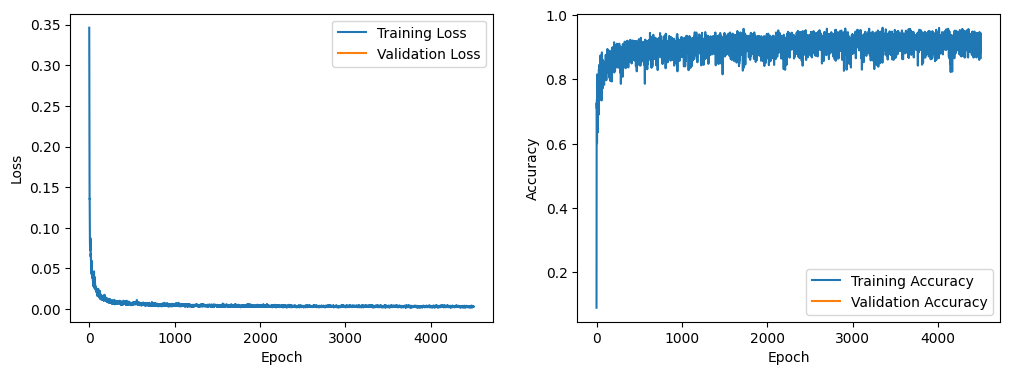

4500 [Loss: 0.0035, Accuracy: 0.8761]
Modelo guardado en: /content/drive/MyDrive/Trabajo fin de grado TFG/Modelos/Modelos Archivos2/UnetRayas/unet.keras
4550 [Loss: 0.0032, Accuracy: 0.8779]
4600 [Loss: 0.0027, Accuracy: 0.9322]
4650 [Loss: 0.0027, Accuracy: 0.9244]
4700 [Loss: 0.0028, Accuracy: 0.8881]
4750 [Loss: 0.0026, Accuracy: 0.9319]
4800 [Loss: 0.0025, Accuracy: 0.9087]
4850 [Loss: 0.0029, Accuracy: 0.9230]
4900 [Loss: 0.0039, Accuracy: 0.9216]
4950 [Loss: 0.0029, Accuracy: 0.9278]


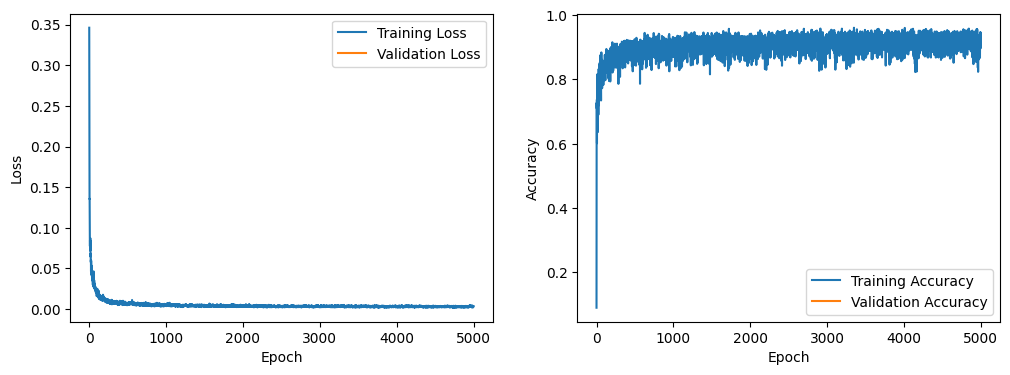

5000 [Loss: 0.0030, Accuracy: 0.9356]
Modelo guardado en: /content/drive/MyDrive/Trabajo fin de grado TFG/Modelos/Modelos Archivos2/UnetRayas/unet.keras
5050 [Loss: 0.0035, Accuracy: 0.9444]
5100 [Loss: 0.0034, Accuracy: 0.9058]
5150 [Loss: 0.0028, Accuracy: 0.9002]
5200 [Loss: 0.0024, Accuracy: 0.9464]
5250 [Loss: 0.0019, Accuracy: 0.8990]
5300 [Loss: 0.0031, Accuracy: 0.9206]
5350 [Loss: 0.0034, Accuracy: 0.9376]
5400 [Loss: 0.0027, Accuracy: 0.9549]
5450 [Loss: 0.0031, Accuracy: 0.9477]


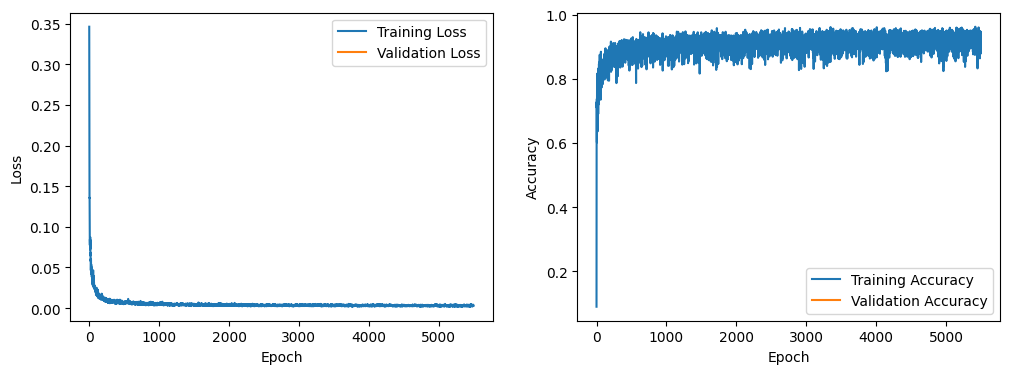

5500 [Loss: 0.0027, Accuracy: 0.9351]
Modelo guardado en: /content/drive/MyDrive/Trabajo fin de grado TFG/Modelos/Modelos Archivos2/UnetRayas/unet.keras
5550 [Loss: 0.0027, Accuracy: 0.9370]
5600 [Loss: 0.0036, Accuracy: 0.9262]
5650 [Loss: 0.0025, Accuracy: 0.9640]
5700 [Loss: 0.0031, Accuracy: 0.9268]
5750 [Loss: 0.0036, Accuracy: 0.9452]
5800 [Loss: 0.0034, Accuracy: 0.9388]
5850 [Loss: 0.0017, Accuracy: 0.9159]
5900 [Loss: 0.0030, Accuracy: 0.9005]
5950 [Loss: 0.0022, Accuracy: 0.9322]


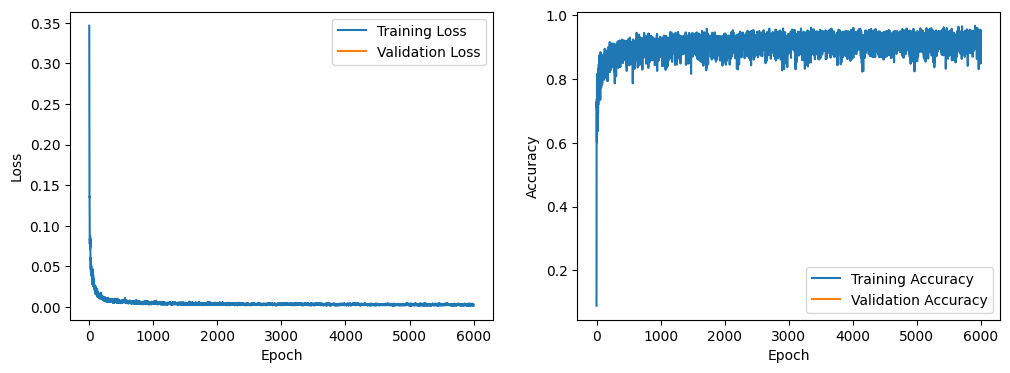

6000 [Loss: 0.0021, Accuracy: 0.9536]
Modelo guardado en: /content/drive/MyDrive/Trabajo fin de grado TFG/Modelos/Modelos Archivos2/UnetRayas/unet.keras
6050 [Loss: 0.0034, Accuracy: 0.8886]
6100 [Loss: 0.0039, Accuracy: 0.9341]
6150 [Loss: 0.0029, Accuracy: 0.9124]
6200 [Loss: 0.0037, Accuracy: 0.9292]
6250 [Loss: 0.0033, Accuracy: 0.8677]
6300 [Loss: 0.0025, Accuracy: 0.9267]


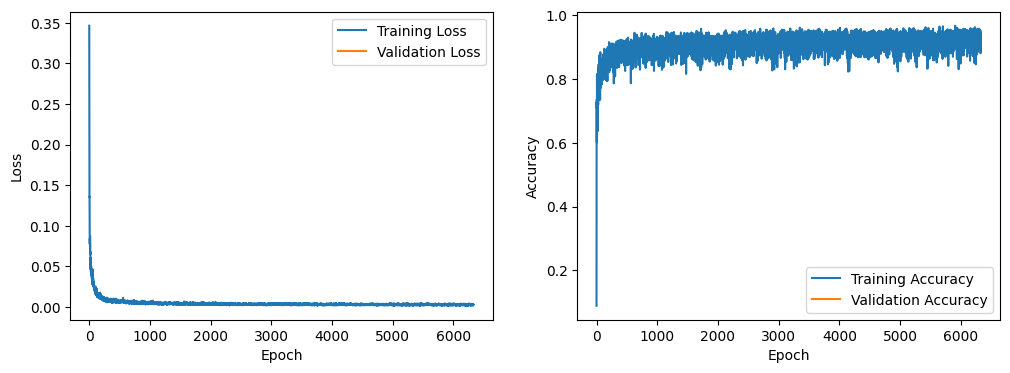

----EPOCH 1-----
0 [Loss: 0.0030, Accuracy: 0.9242]
Modelo guardado en: /content/drive/MyDrive/Trabajo fin de grado TFG/Modelos/Modelos Archivos2/UnetRayas/unet.keras
50 [Loss: 0.0030, Accuracy: 0.8969]
100 [Loss: 0.0026, Accuracy: 0.8970]
150 [Loss: 0.0028, Accuracy: 0.9152]
200 [Loss: 0.0022, Accuracy: 0.9078]
250 [Loss: 0.0021, Accuracy: 0.9278]
300 [Loss: 0.0020, Accuracy: 0.9342]
350 [Loss: 0.0048, Accuracy: 0.8861]
400 [Loss: 0.0033, Accuracy: 0.9244]
450 [Loss: 0.0029, Accuracy: 0.8641]


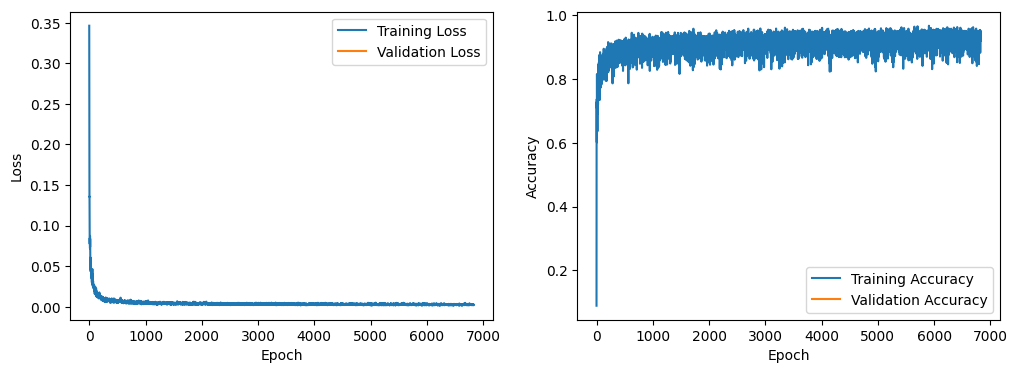

500 [Loss: 0.0032, Accuracy: 0.8648]
Modelo guardado en: /content/drive/MyDrive/Trabajo fin de grado TFG/Modelos/Modelos Archivos2/UnetRayas/unet.keras
550 [Loss: 0.0025, Accuracy: 0.9431]
600 [Loss: 0.0024, Accuracy: 0.9098]
650 [Loss: 0.0022, Accuracy: 0.9149]
700 [Loss: 0.0023, Accuracy: 0.9160]
750 [Loss: 0.0023, Accuracy: 0.9284]
800 [Loss: 0.0027, Accuracy: 0.8979]
850 [Loss: 0.0034, Accuracy: 0.9232]
900 [Loss: 0.0024, Accuracy: 0.9445]
950 [Loss: 0.0028, Accuracy: 0.9513]


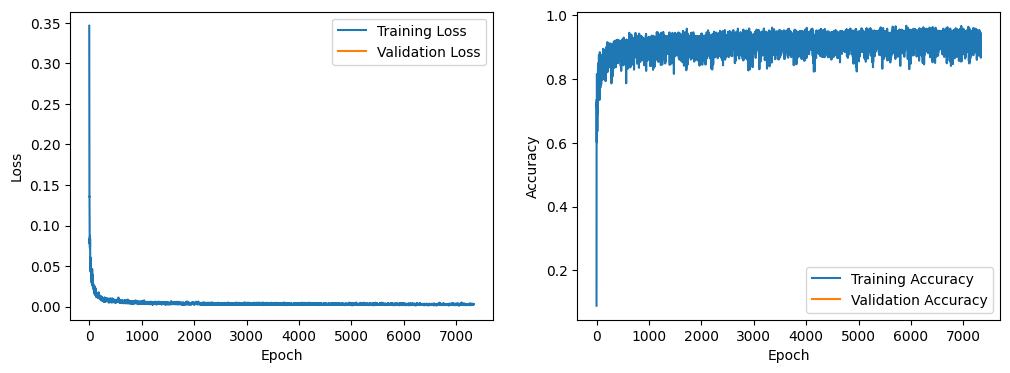

1000 [Loss: 0.0034, Accuracy: 0.9454]
Modelo guardado en: /content/drive/MyDrive/Trabajo fin de grado TFG/Modelos/Modelos Archivos2/UnetRayas/unet.keras
1050 [Loss: 0.0028, Accuracy: 0.9261]
1100 [Loss: 0.0027, Accuracy: 0.8929]
1150 [Loss: 0.0024, Accuracy: 0.9618]


In [ ]:
train(model, epochs=50, batch_size=32, sample_interval=500)